### STEP 1: INITIALIZATION

In [1]:

import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**Import important libraries such as Tensorflow, Keras, Matlab plotting.**

In [2]:
# Importing libraries
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import display, Image # for displaying images
%matplotlib inline
import os

In [25]:
# Getting labels of training data
labels = os.listdir('/content/gdrive/MyDrive/Kaggle dataset/fruits/dataset/train')
labels

['freshapples',
 'freshbanana',
 'freshoranges',
 'rottenapples',
 'rottenbanana',
 'rottenoranges']

In [22]:
!unzip fruits-fresh-and-rotten-for-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.09 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.18 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.24 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.37 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.51 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.02 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.12 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.21 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.31 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [16]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/Kaggle dataset'

In [19]:
!ls
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

fruits	kaggle.json
100% 3.57G/3.58G [01:50<00:00, 33.9MB/s]
100% 3.58G/3.58G [01:50<00:00, 34.9MB/s]


In [20]:

!mkdir fruits
!mv fruits-fresh-and-rotten-for-classification.zip fruits

mkdir: cannot create directory ‘fruits’: File exists


In [21]:
%cd fruits

/content/gdrive/MyDrive/Kaggle dataset/fruits


In [17]:
%cd gdrive/MyDrive/Kaggle dataset

[Errno 2] No such file or directory: 'gdrive/MyDrive/Kaggle dataset'
/content/gdrive/MyDrive/Kaggle dataset



 FRESHAPPLES


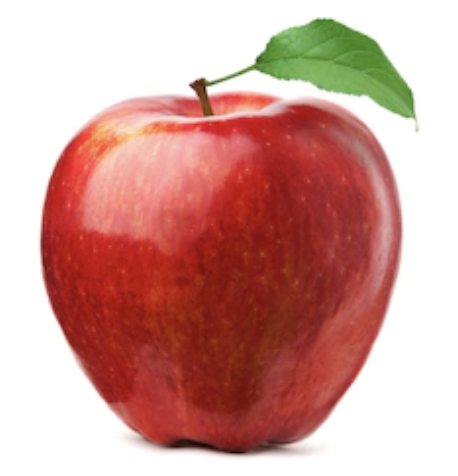

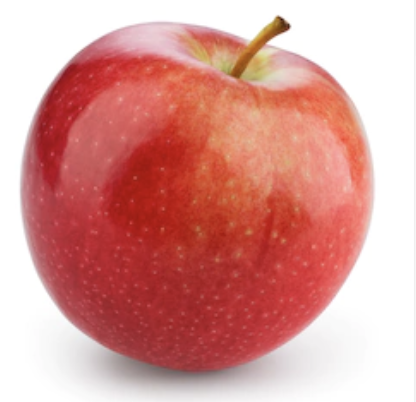

there are  1693  images in  freshapples class

 FRESHBANANA


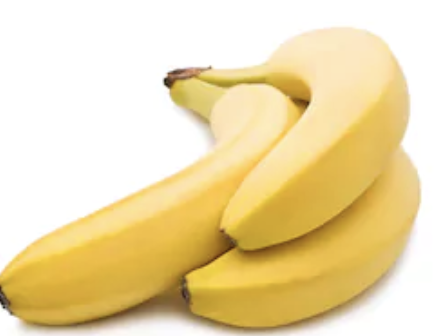

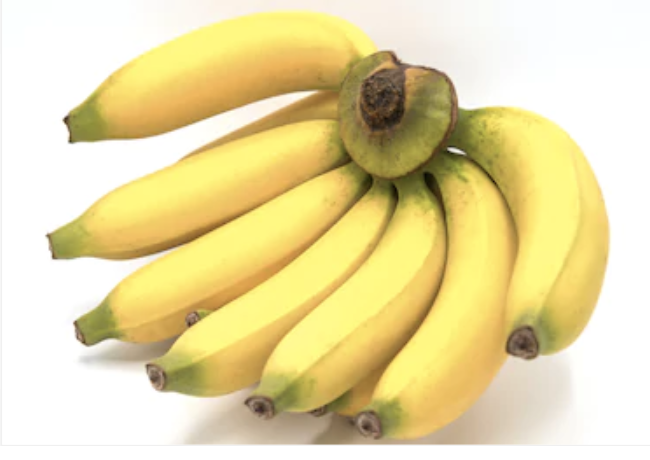

there are  1581  images in  freshbanana class

 FRESHORANGES


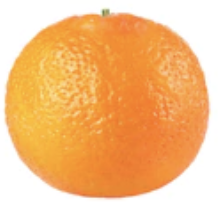

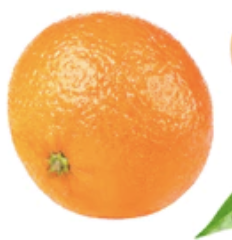

there are  1466  images in  freshoranges class

 ROTTENAPPLES


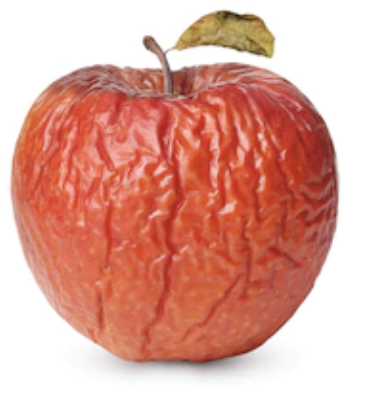

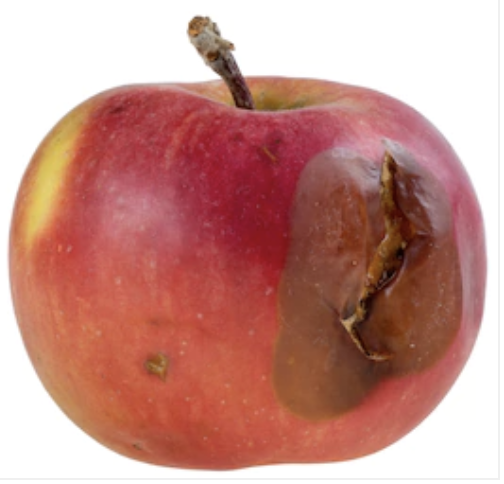

there are  2342  images in  rottenapples class

 ROTTENBANANA


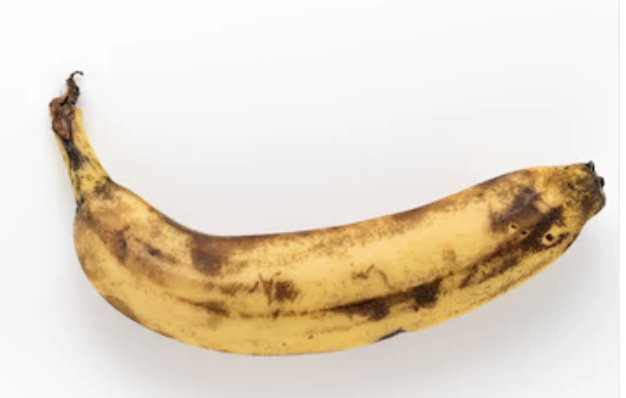

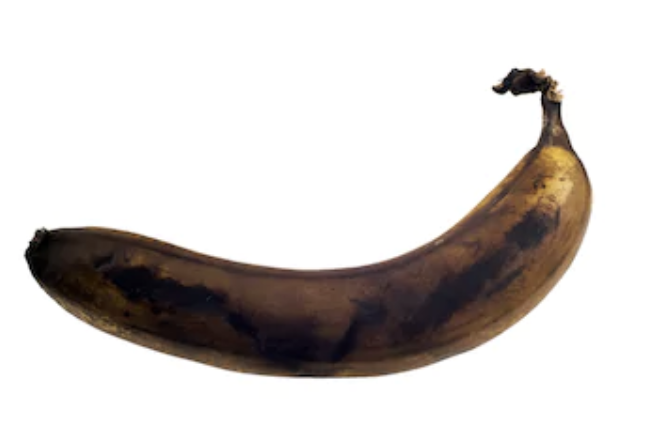

there are  2224  images in  rottenbanana class

 ROTTENORANGES


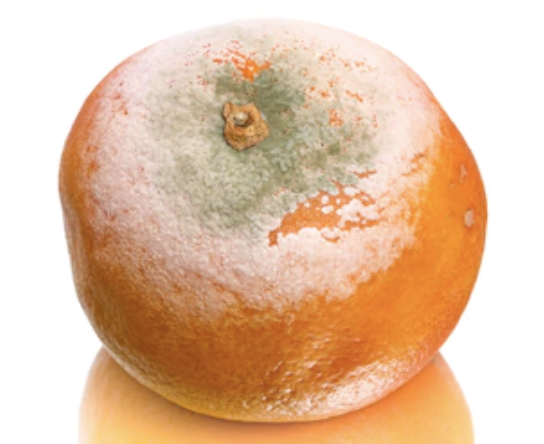

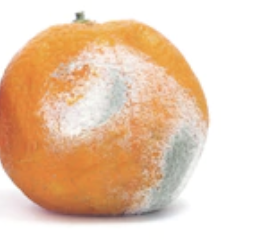

there are  1595  images in  rottenoranges class


In [26]:
num = []

for i in labels:
    path = '/content/gdrive/MyDrive/Kaggle dataset/fruits/dataset/train/{0}/'.format(i)
    folder_data = os.listdir(path)
    k=0
    print('\n', i.upper())
    for j in folder_data:
        if(k<2):
            display(Image(path+j))
        k=k+1
    num.append(k)
    print('there are ', k,' images in ', i, 'class')

In [27]:
# Get images from files using ImageDataGenerator

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

tg = datagen.flow_from_directory(directory='/content/gdrive/MyDrive/Kaggle dataset/fruits/dataset/train', target_size=(20,20), classes=labels, batch_size=25, subset='training')
vg = datagen.flow_from_directory(directory='/content/gdrive/MyDrive/Kaggle dataset/fruits/dataset/train', target_size=(20,20), classes=labels, batch_size=25, subset='validation')

Found 8723 images belonging to 6 classes.
Found 2178 images belonging to 6 classes.


### STEP 3: Build our Convolutional Neural Network

In [28]:
# building model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (20,20,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dense(6, activation='softmax'))

**Compile model.**

In [29]:
# Compile model
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

**Summary of our model**

In [30]:
model.summary(line_length=None, positions=None, print_fn=None)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 18, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 128)               7

In [31]:
# Train model
history = model.fit_generator(generator=tg, steps_per_epoch=len(tg), epochs=8, validation_data=vg, validation_steps=len(vg))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/8
349/349 [==============================] - 83s 236ms/step - loss: 0.8817 - accuracy: 0.6550 - val_loss: 0.4929 - val_accuracy: 0.8072
Epoch 2/8
349/349 [==============================] - 77s 221ms/step - loss: 0.4564 - accuracy: 0.8440 - val_loss: 0.3628 - val_accuracy: 0.8705
Epoch 3/8
349/349 [==============================] - 75s 215ms/step - loss: 0.3525 - accuracy: 0.8775 - val_loss: 0.2905 - val_accuracy: 0.8921
Epoch 4/8
349/349 [==============================] - 76s 217ms/step - loss: 0.2737 - accuracy: 0.9026 - val_loss: 0.2238 - val_accuracy: 0.9229
Epoch 5/8
349/349 [==============================] - 77s 222ms/step - loss: 0.2475 - accuracy: 0.9092 - val_loss: 0.2027 - val_accuracy: 0.9256
Epoch 6/8
349/349 [==============================] - 76s 217ms/step - loss: 0.2007 - accuracy: 0.9272 - val_loss: 0.2185 - val_accuracy: 0.9187
Epoch 7/8
349/349 [==============================] - 75s 214ms/step - loss: 0.1804 - accuracy: 0.9352 - val_loss: 0.2272 - val_accuracy:

### STEP 4: SHOW IMPORTANT PLOTS

**Plot Accuracy over epochs plot(Higher over time is better)**

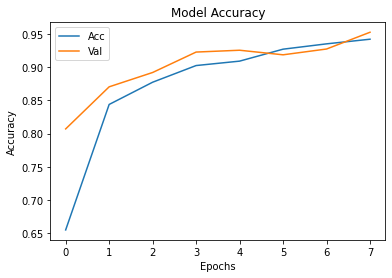

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')

**Plot Loss over epochs plot. (Lower over time is better)**

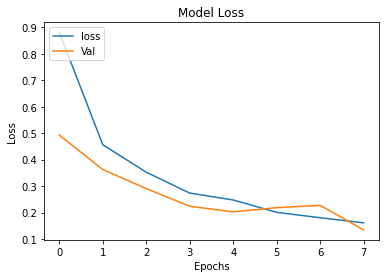

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper left')

**STEP 5: Test our model**

In [34]:
test_set = datagen.flow_from_directory(directory='/content/gdrive/MyDrive/Kaggle dataset/fruits/dataset/test', target_size=(20,20), classes=labels, batch_size=25, subset='validation')

Found 538 images belonging to 6 classes.


In [35]:
prediction = model.predict(test_set)

In [36]:
prediction

array([[2.8788554e-03, 1.4178650e-05, 2.2458781e-02, 8.9148819e-01,
        1.6078034e-06, 8.3158404e-02],
       [4.3155343e-04, 4.1987118e-04, 9.3401176e-01, 1.0076913e-02,
        9.0935657e-07, 5.5059049e-02],
       [2.1867931e-03, 8.3595819e-07, 9.9510139e-01, 2.3646213e-03,
        5.9115483e-11, 3.4630645e-04],
       ...,
       [3.0205982e-07, 1.2333069e-03, 8.6098989e-05, 8.7602353e-03,
        9.8867214e-01, 1.2478312e-03],
       [2.7201574e-03, 2.7672602e-05, 7.6999903e-01, 4.7243182e-03,
        9.8982644e-09, 2.2252879e-01],
       [2.3489405e-05, 2.5533263e-08, 2.6430619e-06, 9.9502486e-01,
        1.2386843e-07, 4.9488181e-03]], dtype=float32)